In [46]:
import datetime

import pandas as pd
from matplotlib import pyplot as plt

from periodic_patterns_v2 import TimeStampSetV2
from periodicity import get_topk_periods

# load some data

In [47]:
df = pd.read_csv('proxy_login.log.csv')
df

,timestamp,connectivity,login_redirect,duration,successfully_logged_in
0,2020-06-16 17:43:44.697989,1,0,0.413221,1
1,2020-06-16 17:44:45.111549,1,0,0.404907,1
2,2020-06-16 17:45:45.516516,1,0,0.397478,1
3,2020-06-16 17:46:45.915872,1,0,0.400688,1
4,2020-06-16 17:47:46.317341,1,0,0.391693,1
...,...,...,...,...,...
402906,2021-08-20 16:01:59.300067,1,0,0.380184,1
402907,2021-08-20 16:02:29.690975,1,0,0.375062,1
402908,2021-08-20 16:03:00.068598,1,0,0.417919,1
402909,2021-08-20 16:03:30.491851,1,0,0.380317,1


In [48]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [49]:
# filter to downtime events after 1 jun 2021
timestamps = df[(df['connectivity'] == 0) & (df['timestamp'] > pd.to_datetime('2021-06-01'))]['timestamp']
timestamps

262125   2021-06-26 10:59:12.132042
271099   2021-06-29 18:01:01.942132
271100   2021-06-29 18:01:43.010527
271101   2021-06-29 18:02:24.081051
271102   2021-06-29 18:03:05.146083
                    ...            
391776   2021-08-16 17:51:02.163514
391777   2021-08-16 17:51:32.192232
391778   2021-08-16 17:52:02.218359
391779   2021-08-16 17:52:32.246160
391780   2021-08-16 17:53:02.271728
Name: timestamp, Length: 243, dtype: datetime64[ns]

# events

In [50]:
tss = TimeStampSetV2(timestamps)
len(tss)

243

In [51]:
tss.hour_of_day.plot()

<AxesSubplot:title={'center':'hour / day-of-week'}, xlabel='day of week', ylabel='hour'>

In [52]:
tss.nth_day_of_month.plot()

<AxesSubplot:title={'center':'n-th day-of-week of each month'}, xlabel='day of week', ylabel='n'>

In [53]:
tss.full_week_of_month.plot()

<AxesSubplot:title={'center':'n-th full week in month / day-of-week'}, xlabel='day of week', ylabel='n-th full week'>

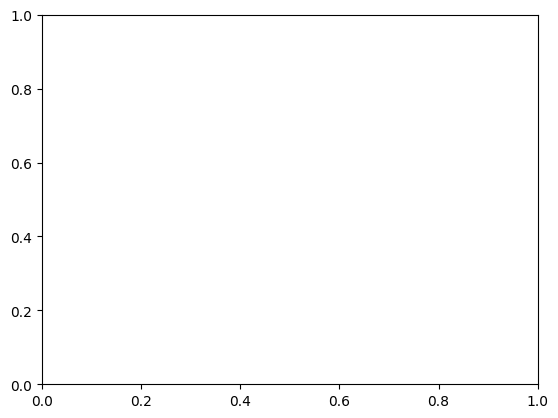

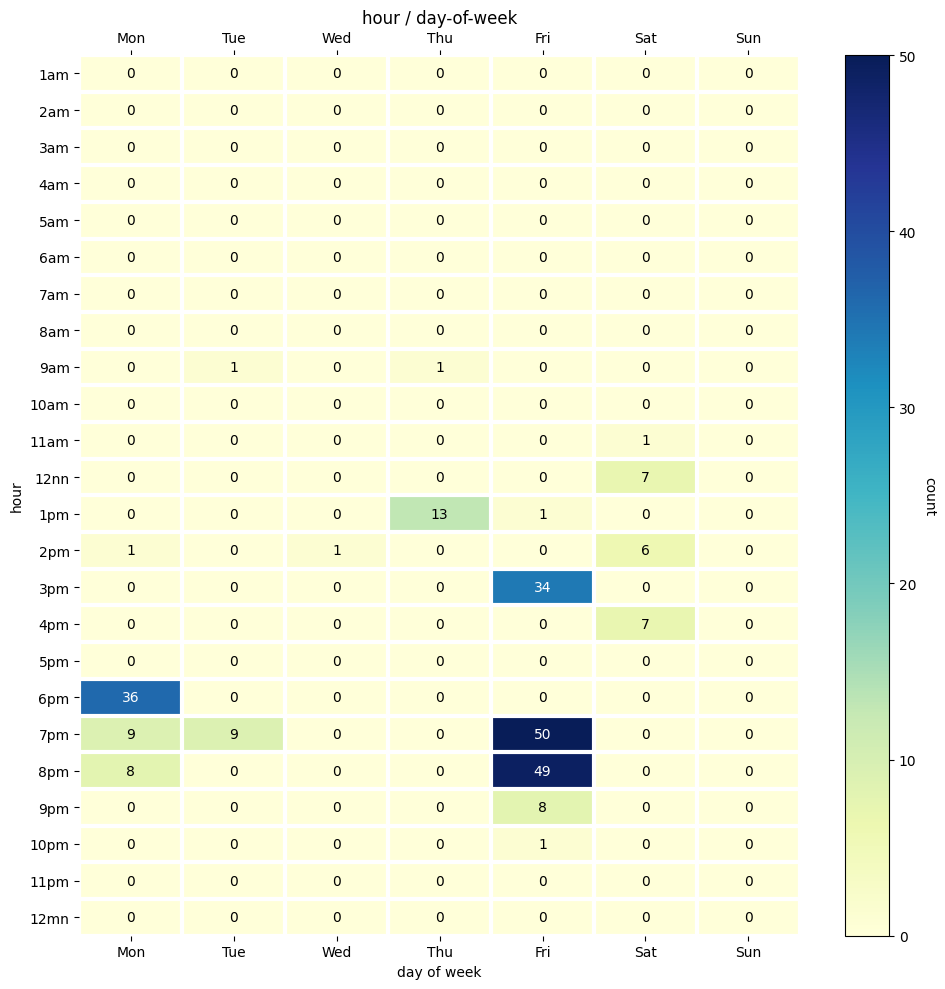

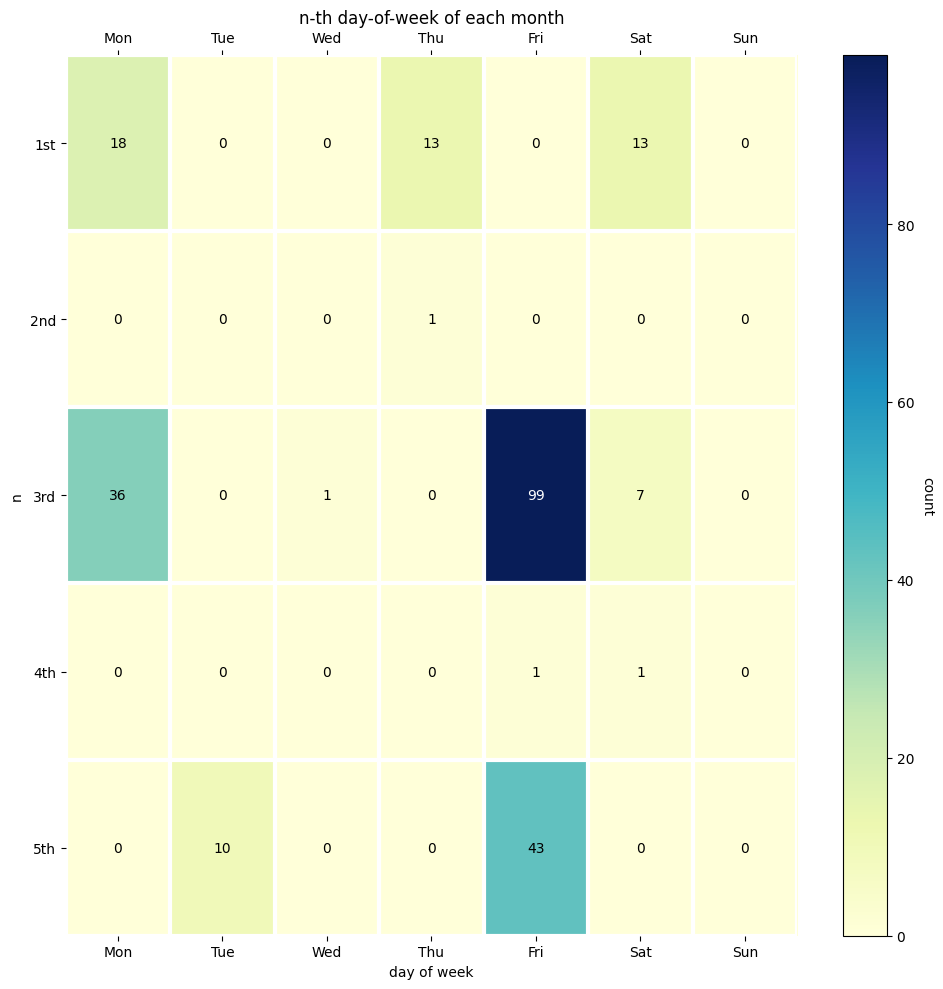

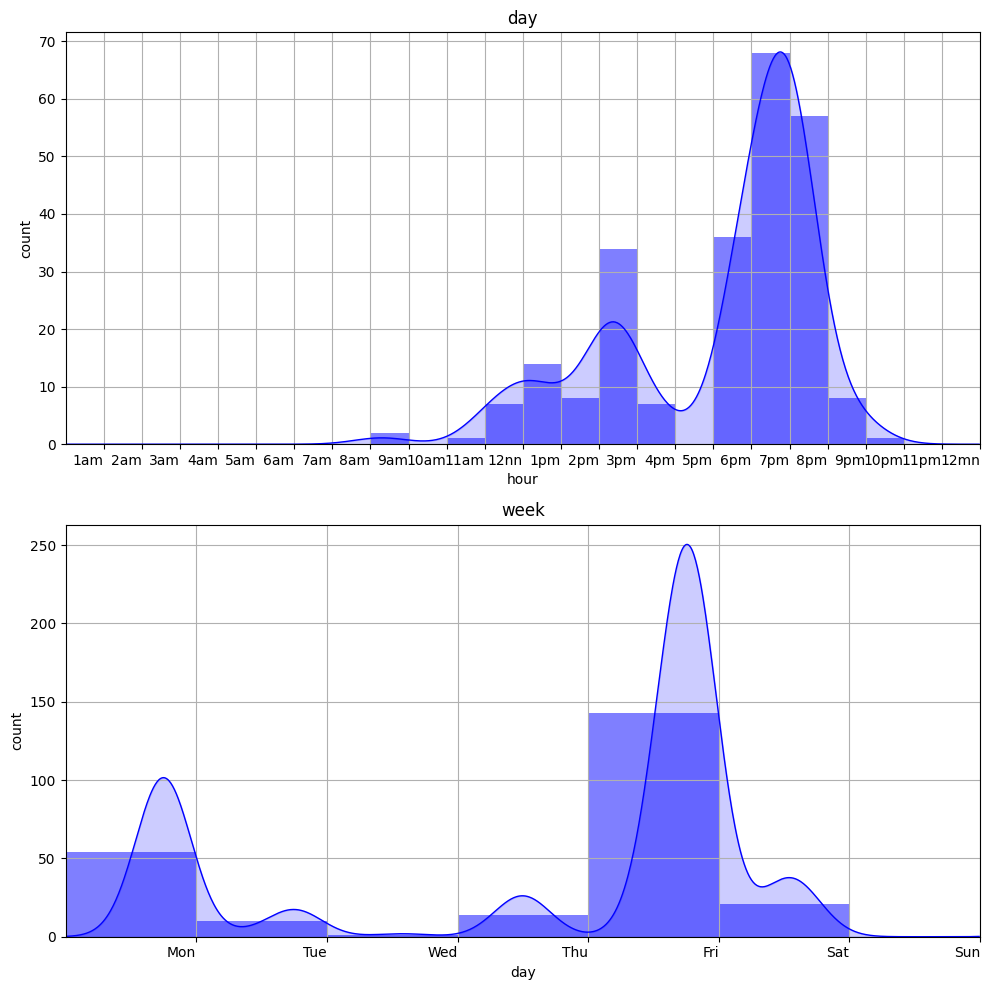

In [54]:
tss.plot()

# group events into sessions based on inter-event times

In [55]:
# group together events N minutes apart and check the number of resulting sessions
for i in range(1,61):
    print(i, len(tss.sessions(datetime.timedelta(minutes=i))))

1 28
2 26
3 25
4 25
5 25
6 25
7 25
8 25
9 25
10 25
11 25
12 24
13 23
14 23
15 23
16 20
17 19
18 19
19 19
20 19
21 18
22 18
23 18
24 18
25 18
26 18
27 18
28 18
29 18
30 18
31 18
32 18
33 18
34 18
35 18
36 18
37 18
38 18
39 18
40 18
41 18
42 18
43 18
44 18
45 18
46 18
47 18
48 18
49 18
50 18
51 18
52 18
53 17
54 17
55 17
56 17
57 17
58 17
59 17
60 17


In [56]:
tss2 = tss.session_set(datetime.timedelta(minutes=10))
len(tss2)

25

In [57]:
tss2.timestamps

[datetime.datetime(2021, 6, 26, 10, 59, 12, 132042, tzinfo=datetime.timezone.utc),
 datetime.datetime(2021, 6, 29, 18, 1, 1, 942132, tzinfo=datetime.timezone.utc),
 datetime.datetime(2021, 7, 1, 12, 4, 23, 198771, tzinfo=datetime.timezone.utc),
 datetime.datetime(2021, 7, 3, 11, 8, 13, 755976, tzinfo=datetime.timezone.utc),
 datetime.datetime(2021, 7, 3, 15, 33, 46, 686442, tzinfo=datetime.timezone.utc),
 datetime.datetime(2021, 7, 5, 18, 8, 59, 414193, tzinfo=datetime.timezone.utc),
 datetime.datetime(2021, 7, 5, 19, 6, 26, 34818, tzinfo=datetime.timezone.utc),
 datetime.datetime(2021, 7, 8, 8, 15, 52, 158752, tzinfo=datetime.timezone.utc),
 datetime.datetime(2021, 7, 14, 13, 49, 45, 303708, tzinfo=datetime.timezone.utc),
 datetime.datetime(2021, 7, 16, 14, 14, 15, 668458, tzinfo=datetime.timezone.utc),
 datetime.datetime(2021, 7, 16, 18, 32, 58, 277875, tzinfo=datetime.timezone.utc),
 datetime.datetime(2021, 7, 17, 13, 6, 3, 996726, tzinfo=datetime.timezone.utc),
 datetime.datetime(2

In [58]:
tss2.hour_of_day.plot()

<AxesSubplot:title={'center':'hour / day-of-week'}, xlabel='day of week', ylabel='hour'>

In [59]:
tss2.nth_day_of_month.plot()

<AxesSubplot:title={'center':'n-th day-of-week of each month'}, xlabel='day of week', ylabel='n'>

In [60]:
tss2.full_week_of_month.plot()

<AxesSubplot:title={'center':'n-th full week in month / day-of-week'}, xlabel='day of week', ylabel='n-th full week'>

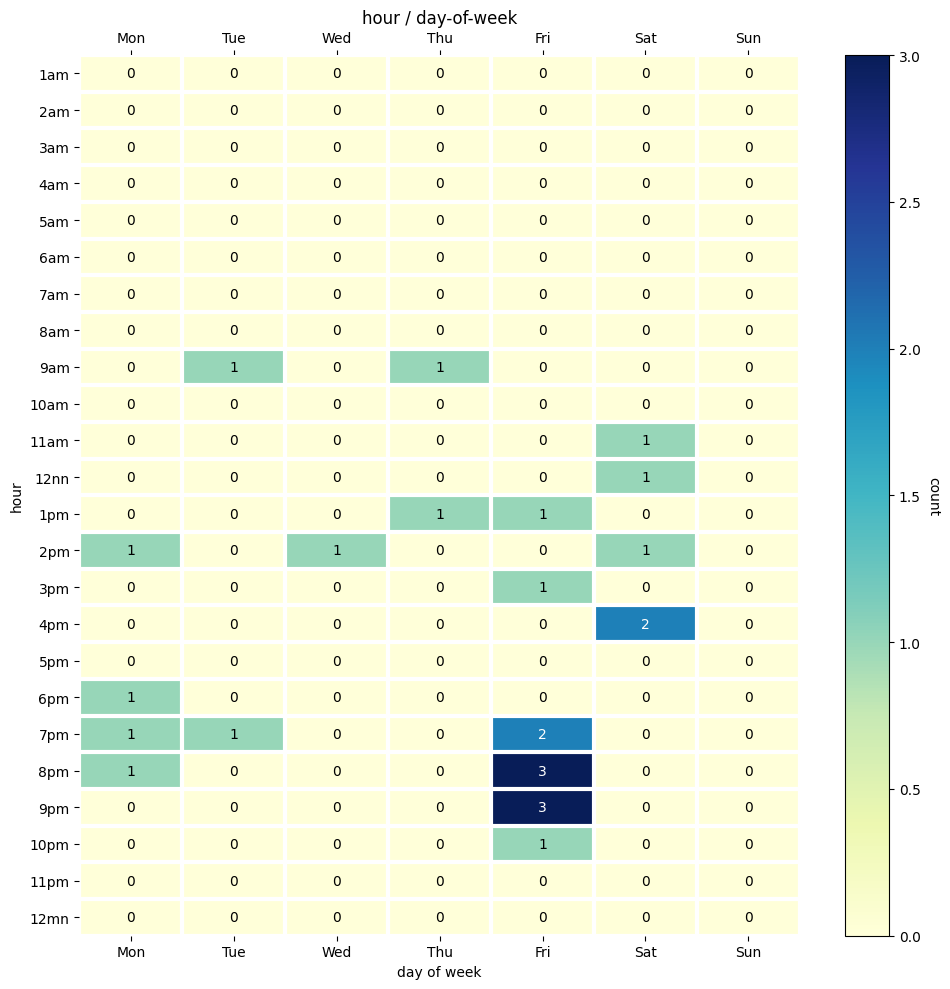

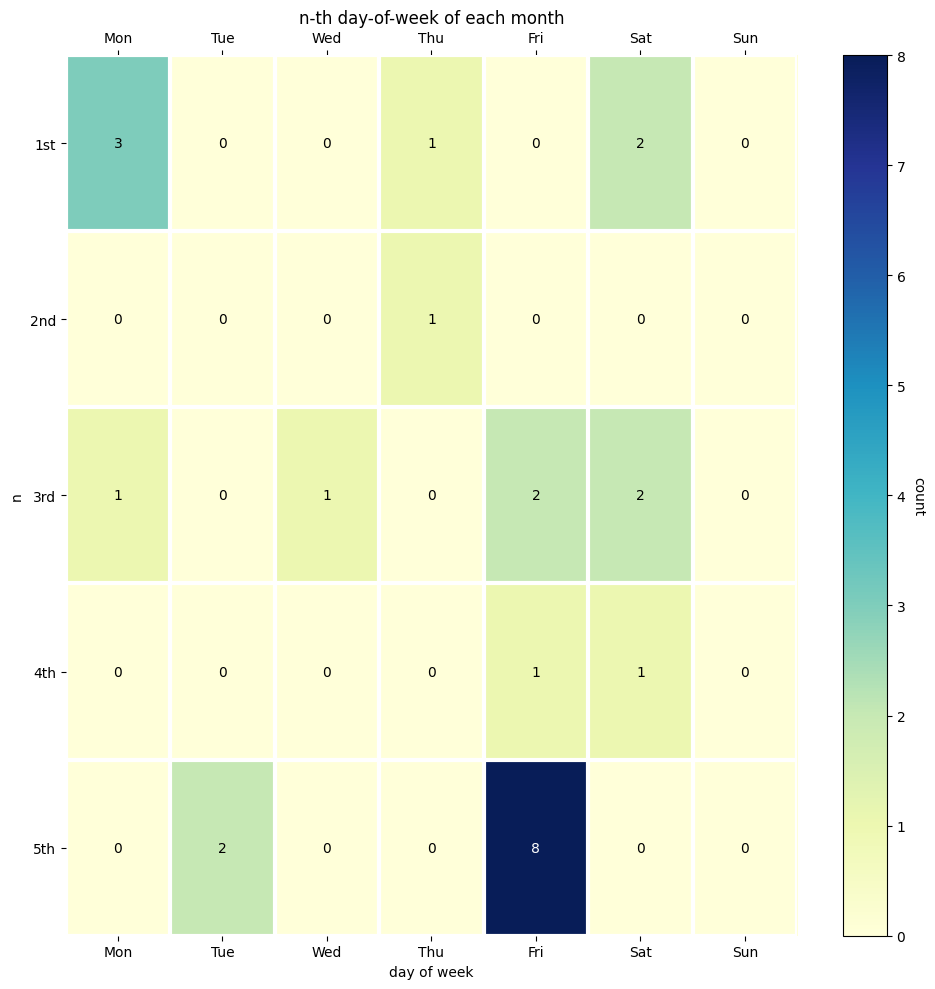

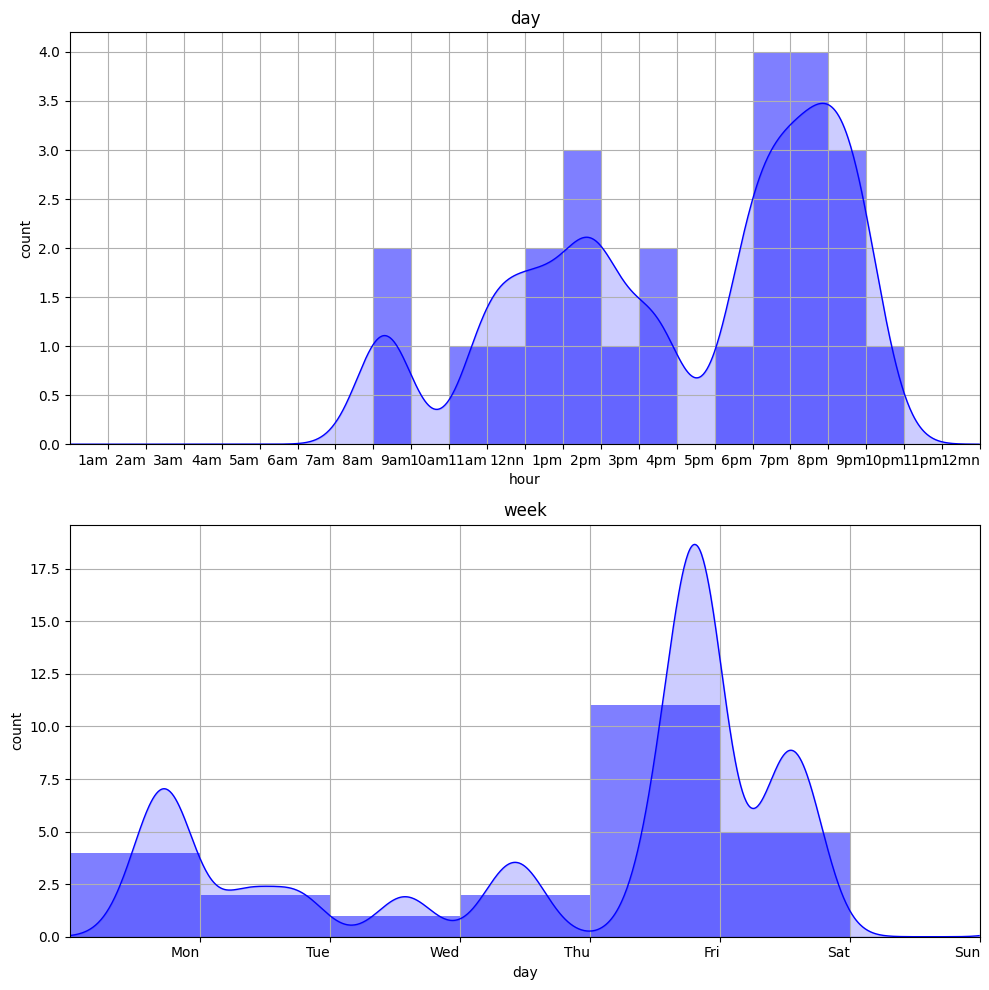

In [61]:
tss2.plot()

In [62]:
tss2.day.plot(figsize=(10,5))

<AxesSubplot:title={'center':'day'}, xlabel='hour', ylabel='count'>

In [63]:
tss2.week.plot(figsize=(10,5))

<AxesSubplot:title={'center':'week'}, xlabel='day', ylabel='count'>

In [64]:
tss2.month.plot(figsize=(10,7))

<AxesSubplot:title={'center':'month'}, xlabel='10-day period', ylabel='count'>

2021-06-26 10:59:12.132042+00:00 Saturday 0.061423157687976605
2021-07-01 12:04:23.198771+00:00 Thursday 0.1435158207436127
2021-07-01 12:05:04.262477+00:00 Thursday 0.1435158207436127
2021-07-01 12:05:45.339210+00:00 Thursday 0.1435158207436127
2021-07-01 12:06:15.346555+00:00 Thursday 0.1435158207436127
2021-07-01 12:06:56.431562+00:00 Thursday 0.1435158207436127
2021-07-01 12:07:26.439169+00:00 Thursday 0.1435158207436127
2021-07-01 12:08:07.482168+00:00 Thursday 0.1435158207436127
2021-07-01 12:08:37.498706+00:00 Thursday 0.1435158207436127
2021-07-01 12:09:18.583469+00:00 Thursday 0.14336719691463487
2021-07-01 12:09:48.599077+00:00 Thursday 0.14336719691463487
2021-07-01 12:10:29.671232+00:00 Thursday 0.14336719691463487
2021-07-01 12:10:59.689482+00:00 Thursday 0.14336719691463487
2021-07-01 12:11:40.756067+00:00 Thursday 0.14336719691463487
2021-07-03 11:08:13.755976+00:00 Saturday 0.12218074594028477
2021-07-03 11:08:54.806161+00:00 Saturday 0.12218074594028477
2021-07-03 11:0

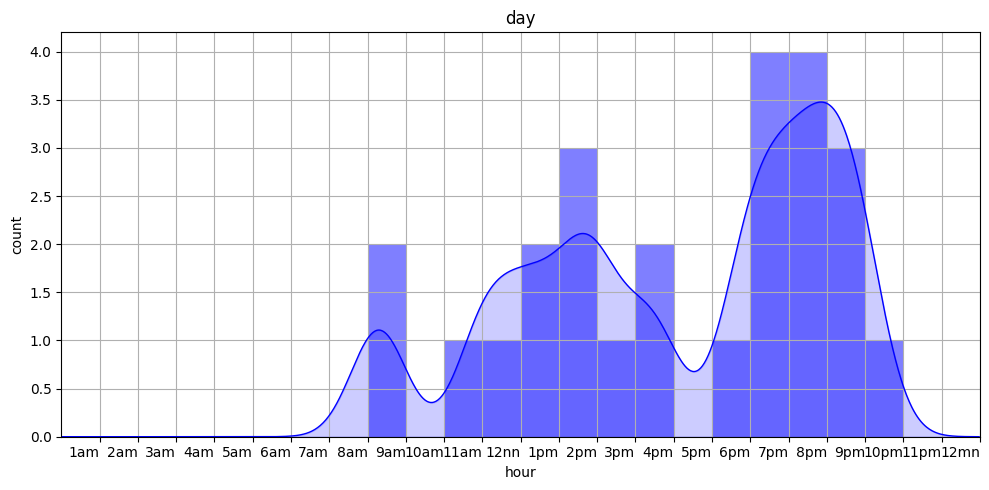

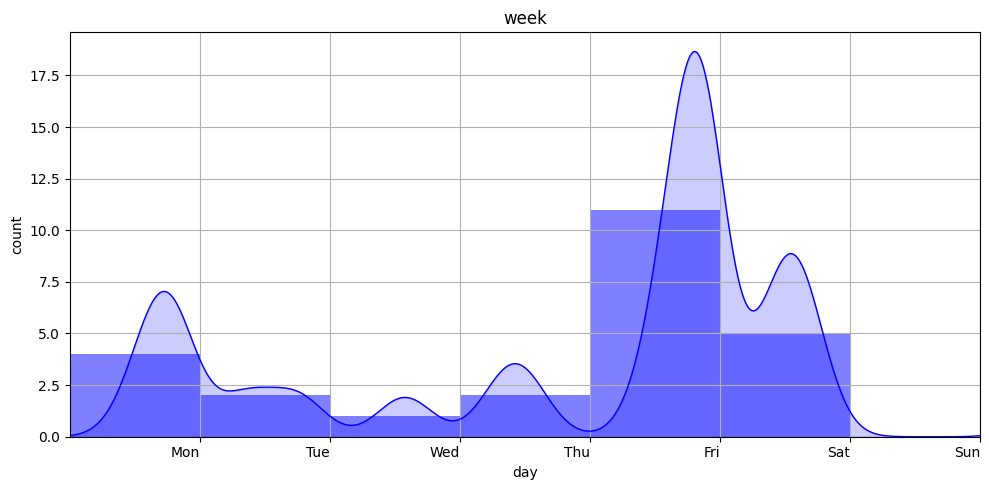

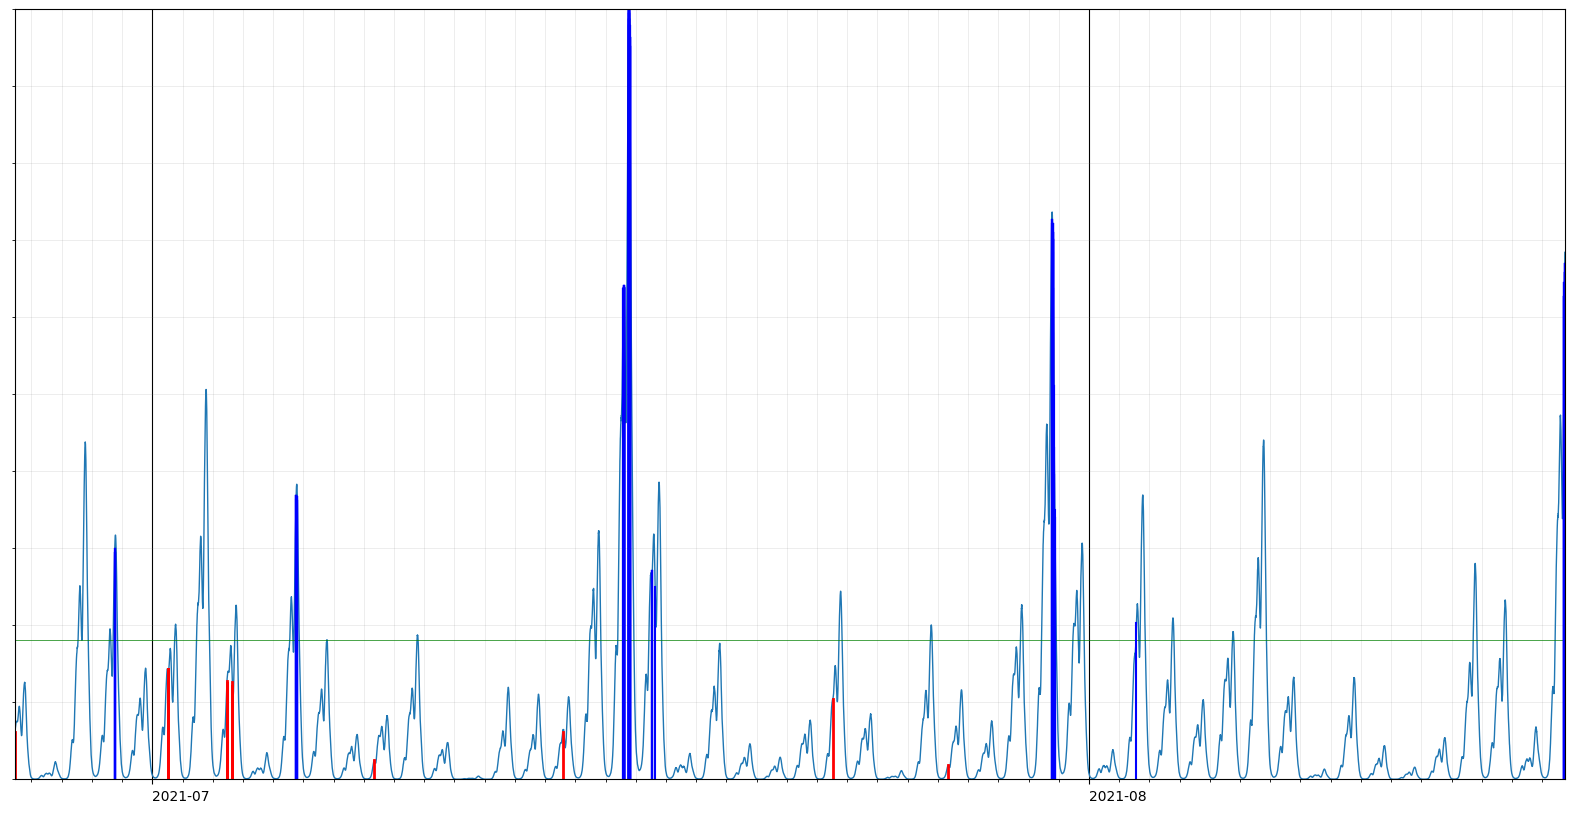

In [65]:
tss.plot_session_likelihoods(figsize=(20,10))

2021-06-26 10:59:12.132042+00:00 Saturday 0.34046970508986885
2021-07-01 12:04:23.198771+00:00 Thursday 0.3243132516949807
2021-07-03 15:33:46.686442+00:00 Saturday 0.35637184047970266
2021-07-08 08:15:52.158752+00:00 Thursday 0.18750847675190652
2021-07-14 13:49:45.303708+00:00 Wednesday 0.2049975865546628
2021-07-23 12:19:41.360775+00:00 Friday 0.31430401811497405
2021-07-27 08:19:25.063662+00:00 Tuesday 0.2047821926887103


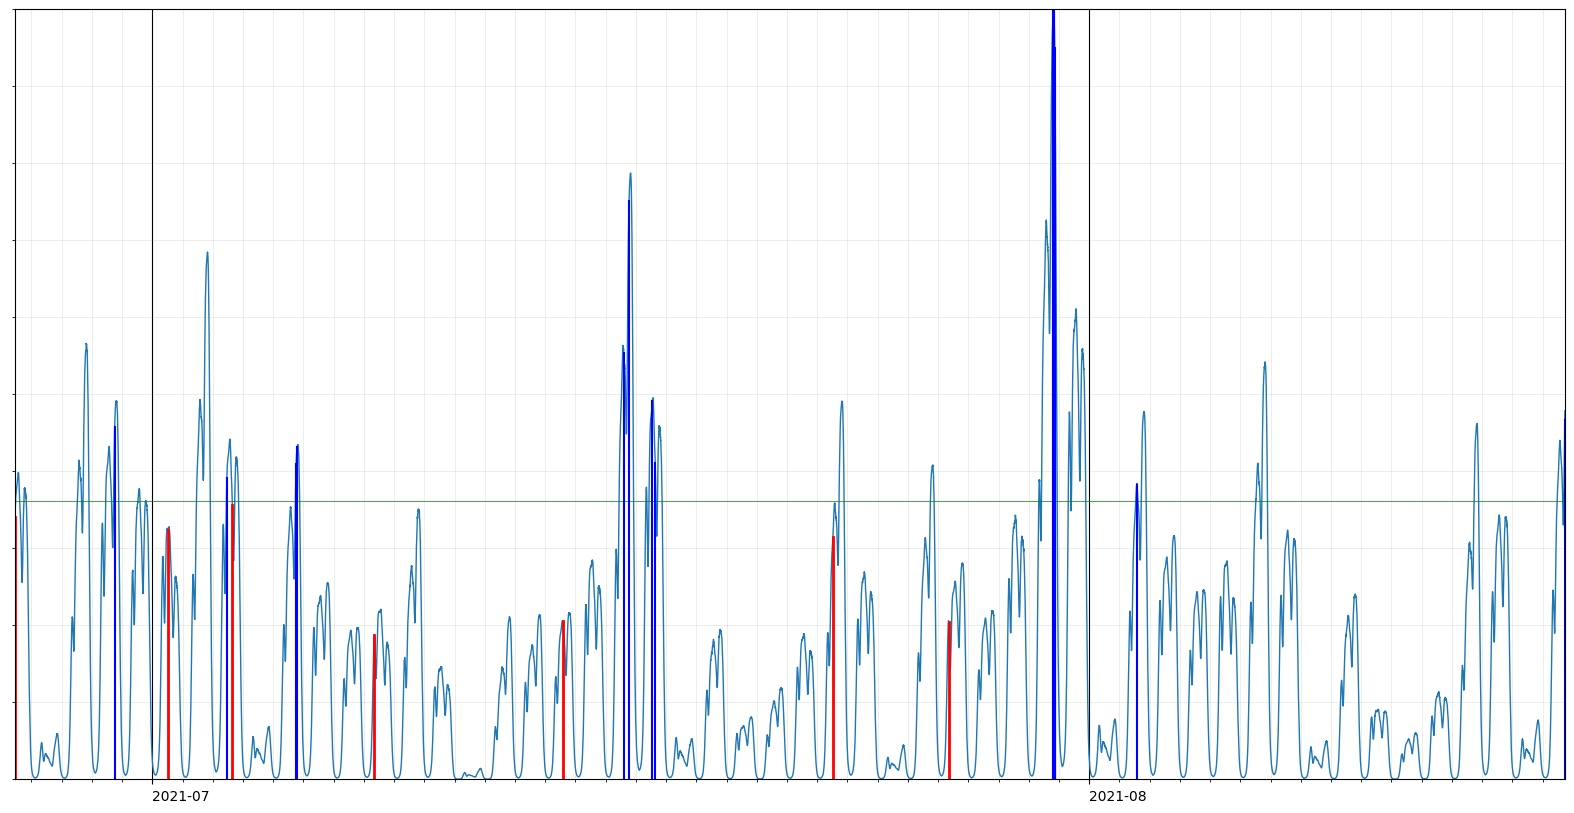

In [66]:
tss2.plot_session_likelihoods(figsize=(20,10))

2021-06-26 10:59:12.132042+00:00 Saturday 0.34046970508986885
2021-07-01 12:04:23.198771+00:00 Thursday 0.3243132516949807
2021-07-03 15:33:46.686442+00:00 Saturday 0.35637184047970266
2021-07-08 08:15:52.158752+00:00 Thursday 0.18750847675190652
2021-07-14 13:49:45.303708+00:00 Wednesday 0.2049975865546628
2021-07-23 12:19:41.360775+00:00 Friday 0.31430401811497405
2021-07-27 08:19:25.063662+00:00 Tuesday 0.2047821926887103


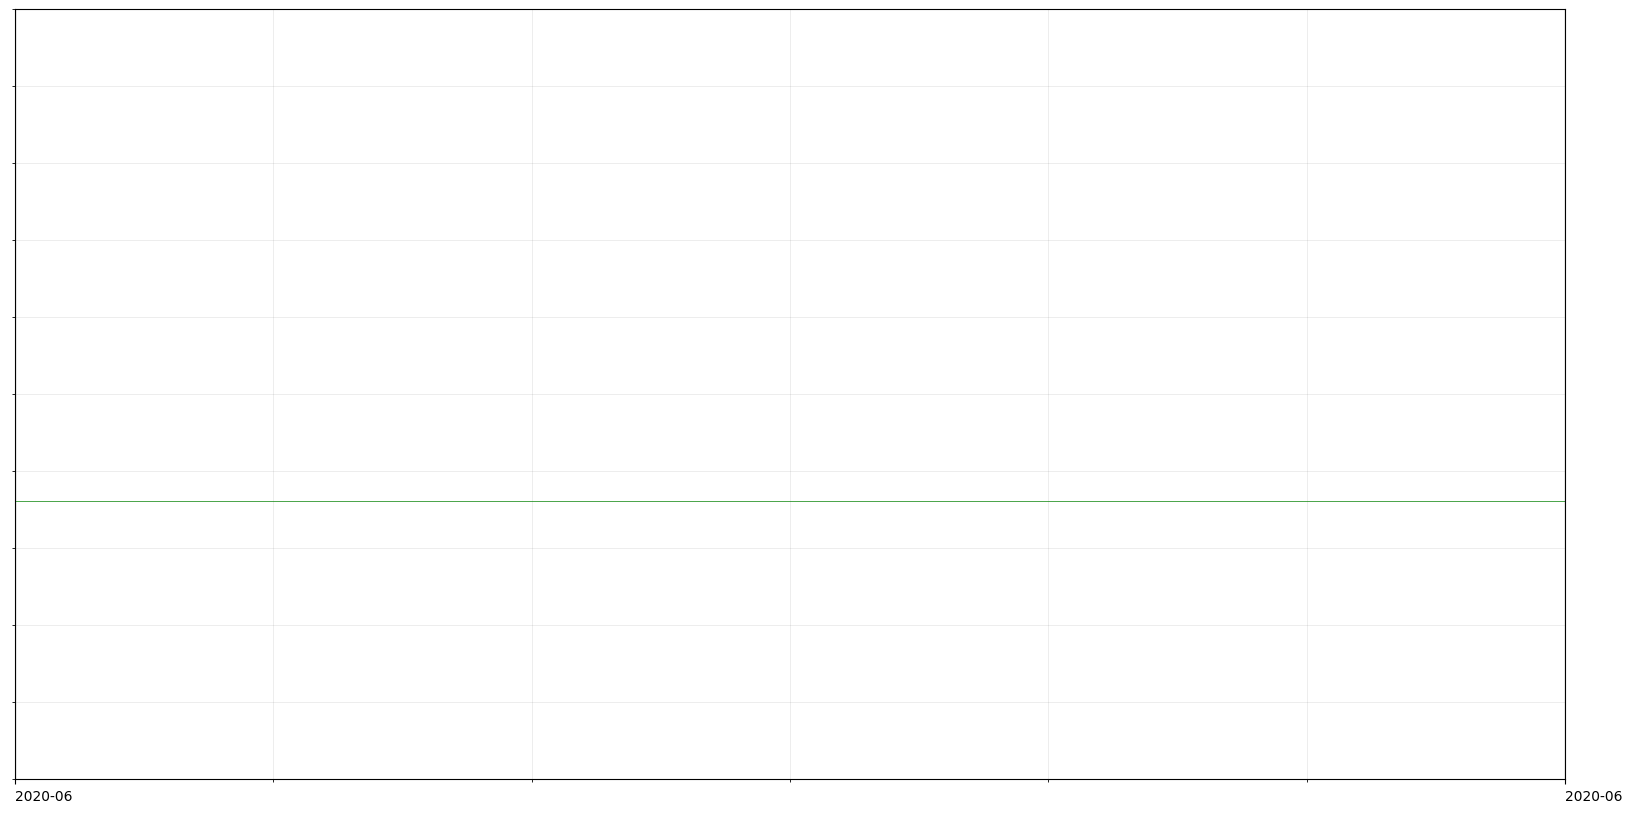

In [67]:
# filter to about 1 week
tss2.plot_session_likelihoods(figsize=(20,10), x_lim=(datetime.datetime(2020,6,8),datetime.datetime(2020,6,14)))

2021-06-26 10:59:12.132042+00:00 Saturday 0.34046970508986885
2021-07-01 12:04:23.198771+00:00 Thursday 0.3243132516949807
2021-07-03 15:33:46.686442+00:00 Saturday 0.35637184047970266
2021-07-08 08:15:52.158752+00:00 Thursday 0.18750847675190652
2021-07-14 13:49:45.303708+00:00 Wednesday 0.2049975865546628
2021-07-23 12:19:41.360775+00:00 Friday 0.31430401811497405
2021-07-27 08:19:25.063662+00:00 Tuesday 0.2047821926887103


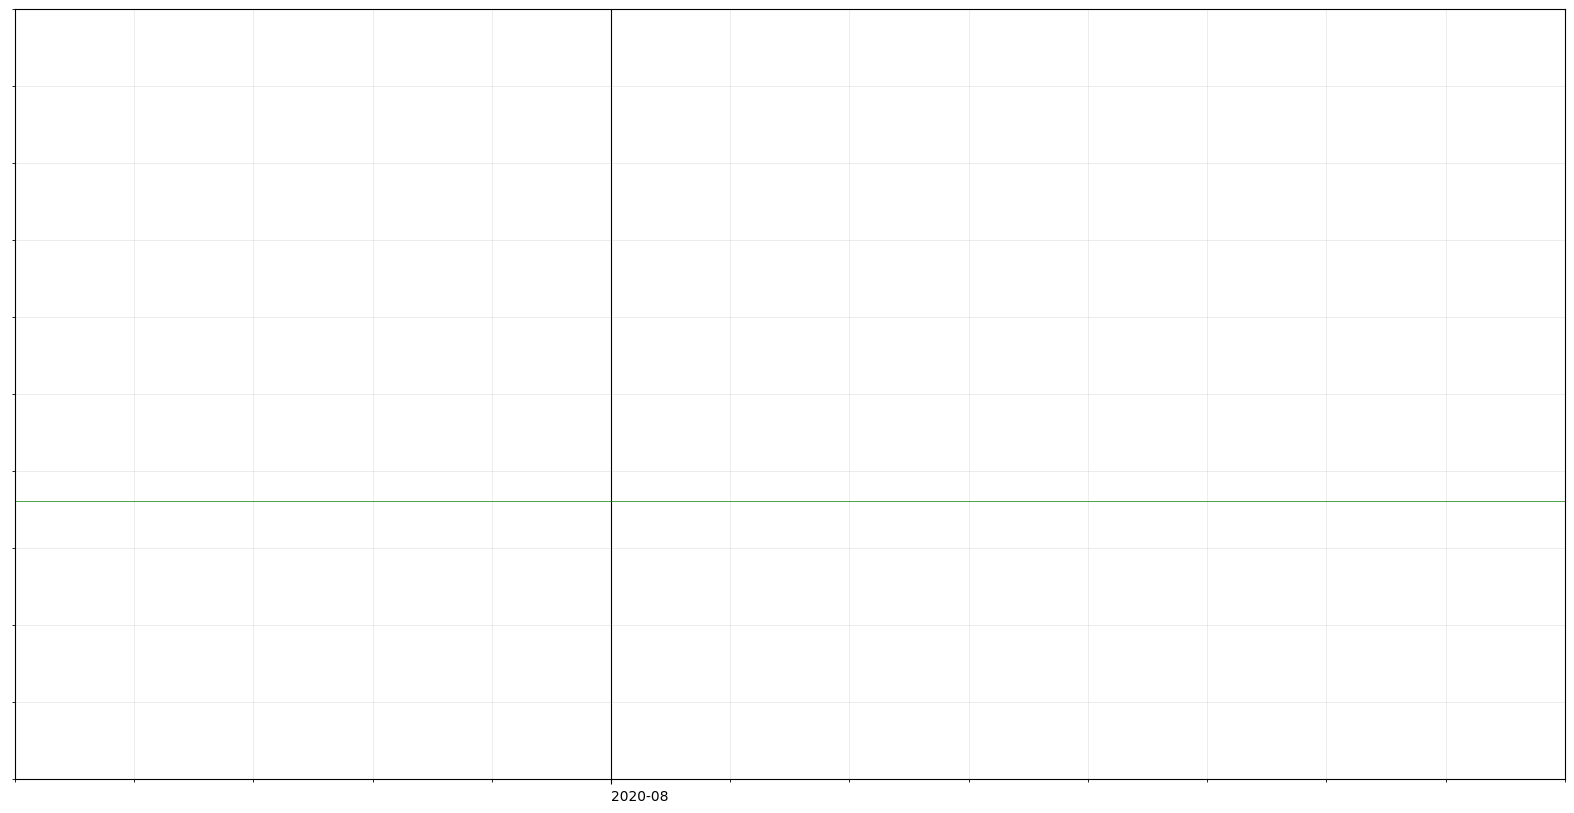

In [68]:
tss2.plot_session_likelihoods(figsize=(20,10), x_lim=(datetime.datetime(2020,7,27),datetime.datetime(2020,8,9)))


In [84]:
tss3 = tss.session_set(datetime.timedelta(minutes=12*60))
len(tss3)

14

In [85]:
tss3.timestamps

[datetime.datetime(2021, 6, 26, 10, 59, 12, 132042, tzinfo=datetime.timezone.utc),
 datetime.datetime(2021, 6, 29, 18, 1, 1, 942132, tzinfo=datetime.timezone.utc),
 datetime.datetime(2021, 7, 1, 12, 4, 23, 198771, tzinfo=datetime.timezone.utc),
 datetime.datetime(2021, 7, 3, 11, 8, 13, 755976, tzinfo=datetime.timezone.utc),
 datetime.datetime(2021, 7, 5, 18, 8, 59, 414193, tzinfo=datetime.timezone.utc),
 datetime.datetime(2021, 7, 8, 8, 15, 52, 158752, tzinfo=datetime.timezone.utc),
 datetime.datetime(2021, 7, 14, 13, 49, 45, 303708, tzinfo=datetime.timezone.utc),
 datetime.datetime(2021, 7, 16, 14, 14, 15, 668458, tzinfo=datetime.timezone.utc),
 datetime.datetime(2021, 7, 17, 13, 6, 3, 996726, tzinfo=datetime.timezone.utc),
 datetime.datetime(2021, 7, 23, 12, 19, 41, 360775, tzinfo=datetime.timezone.utc),
 datetime.datetime(2021, 7, 27, 8, 19, 25, 63662, tzinfo=datetime.timezone.utc),
 datetime.datetime(2021, 7, 30, 18, 56, 2, 372878, tzinfo=datetime.timezone.utc),
 datetime.datetime(

In [86]:
tss3.hour_of_day.plot()

<AxesSubplot:title={'center':'hour / day-of-week'}, xlabel='day of week', ylabel='hour'>

In [87]:
tss3.nth_day_of_month.plot()

<AxesSubplot:title={'center':'n-th day-of-week of each month'}, xlabel='day of week', ylabel='n'>

In [88]:
tss3.full_week_of_month.plot()

<AxesSubplot:title={'center':'n-th full week in month / day-of-week'}, xlabel='day of week', ylabel='n-th full week'>

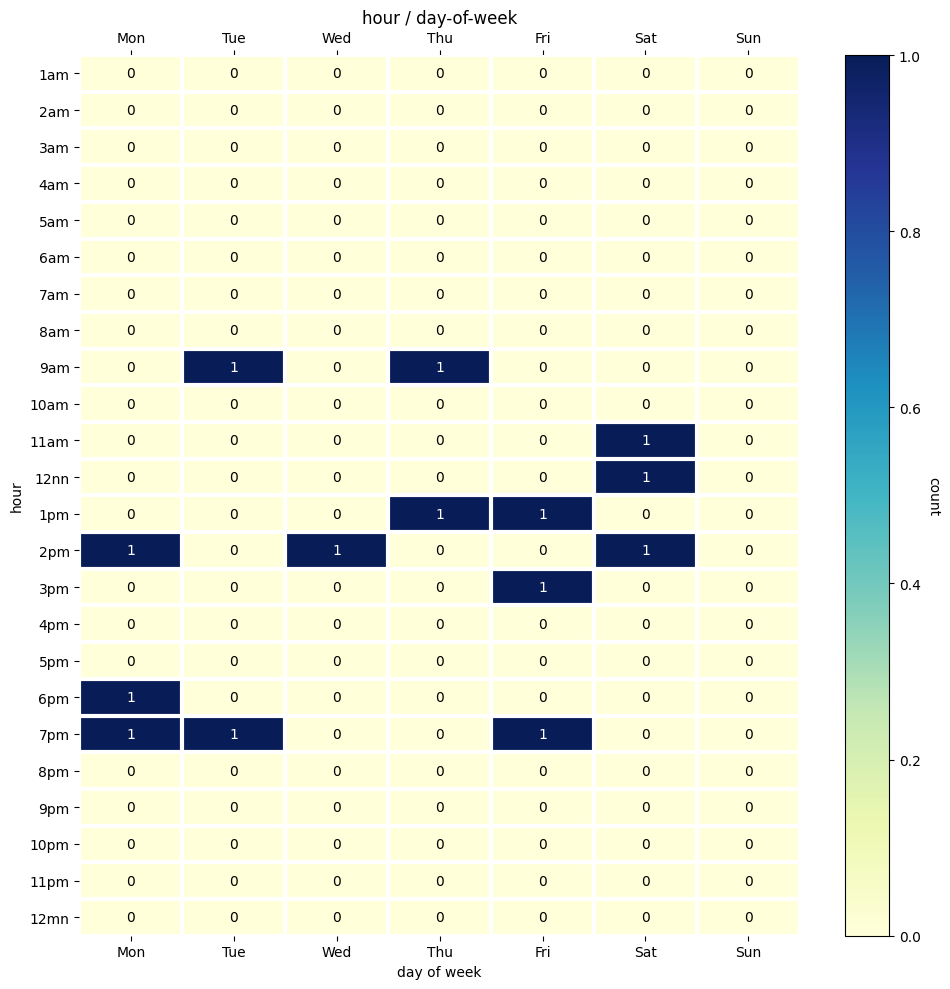

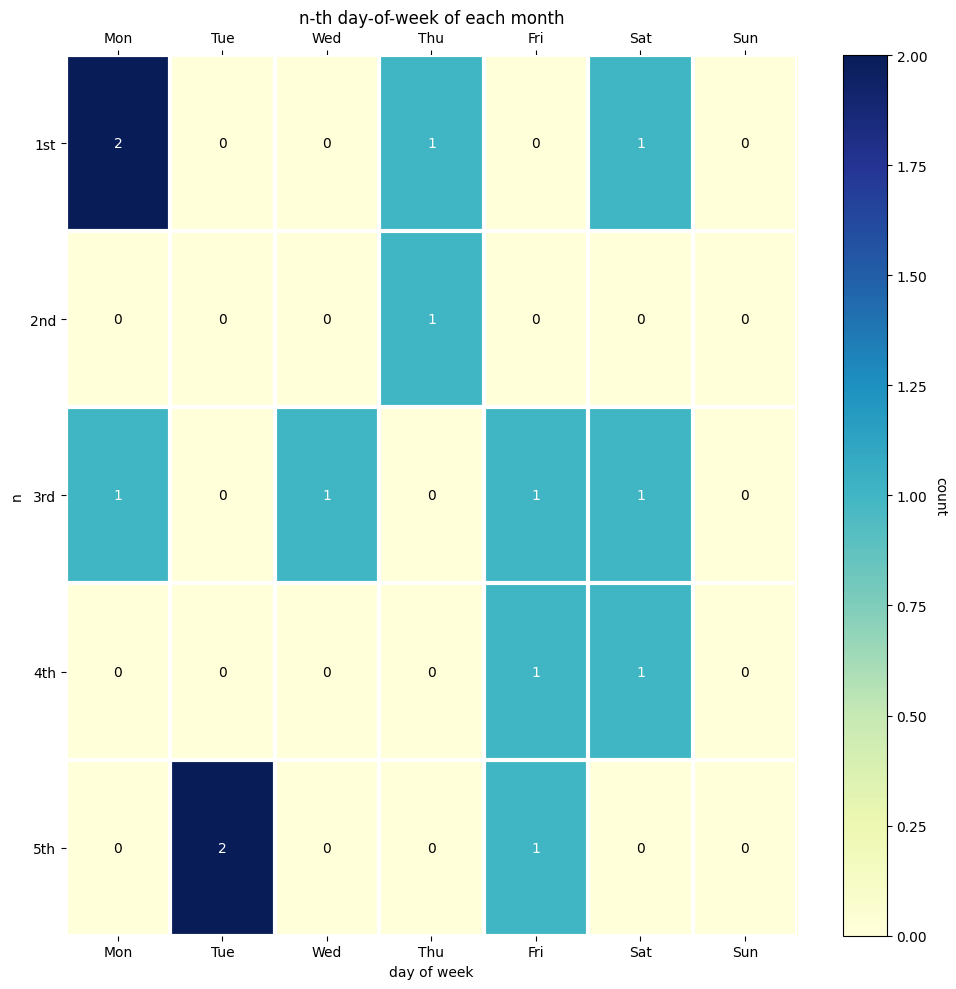

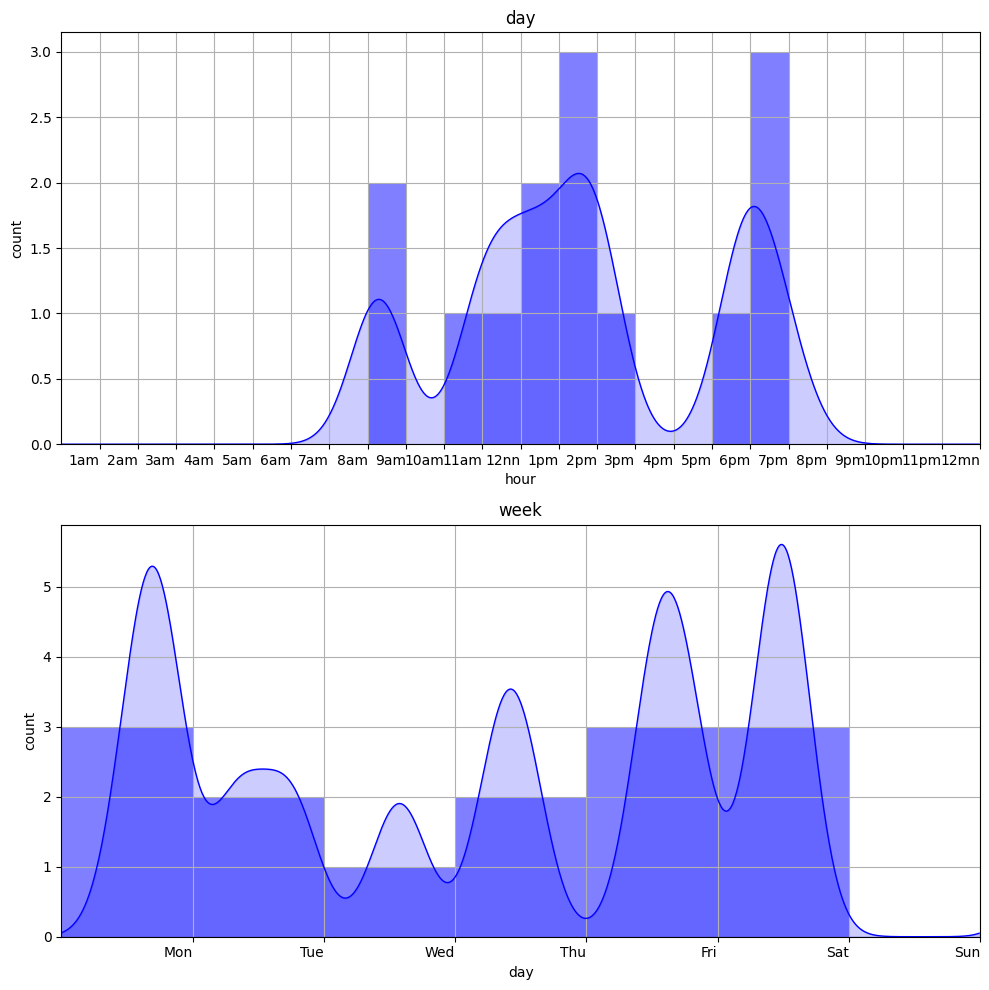

In [89]:
tss3.plot()

In [90]:
tss3.day.plot(figsize=(10,5))

<AxesSubplot:title={'center':'day'}, xlabel='hour', ylabel='count'>

In [91]:
tss3.week.plot(figsize=(10,5))

<AxesSubplot:title={'center':'week'}, xlabel='day', ylabel='count'>

In [92]:
tss3.month.plot(figsize=(10,7))

<AxesSubplot:title={'center':'month'}, xlabel='10-day period', ylabel='count'>

2021-06-26 10:59:12.132042+00:00 Saturday 0.061423157687976605
2021-07-01 12:04:23.198771+00:00 Thursday 0.1435158207436127
2021-07-01 12:05:04.262477+00:00 Thursday 0.1435158207436127
2021-07-01 12:05:45.339210+00:00 Thursday 0.1435158207436127
2021-07-01 12:06:15.346555+00:00 Thursday 0.1435158207436127
2021-07-01 12:06:56.431562+00:00 Thursday 0.1435158207436127
2021-07-01 12:07:26.439169+00:00 Thursday 0.1435158207436127
2021-07-01 12:08:07.482168+00:00 Thursday 0.1435158207436127
2021-07-01 12:08:37.498706+00:00 Thursday 0.1435158207436127
2021-07-01 12:09:18.583469+00:00 Thursday 0.14336719691463487
2021-07-01 12:09:48.599077+00:00 Thursday 0.14336719691463487
2021-07-01 12:10:29.671232+00:00 Thursday 0.14336719691463487
2021-07-01 12:10:59.689482+00:00 Thursday 0.14336719691463487
2021-07-01 12:11:40.756067+00:00 Thursday 0.14336719691463487
2021-07-03 11:08:13.755976+00:00 Saturday 0.12218074594028477
2021-07-03 11:08:54.806161+00:00 Saturday 0.12218074594028477
2021-07-03 11:0

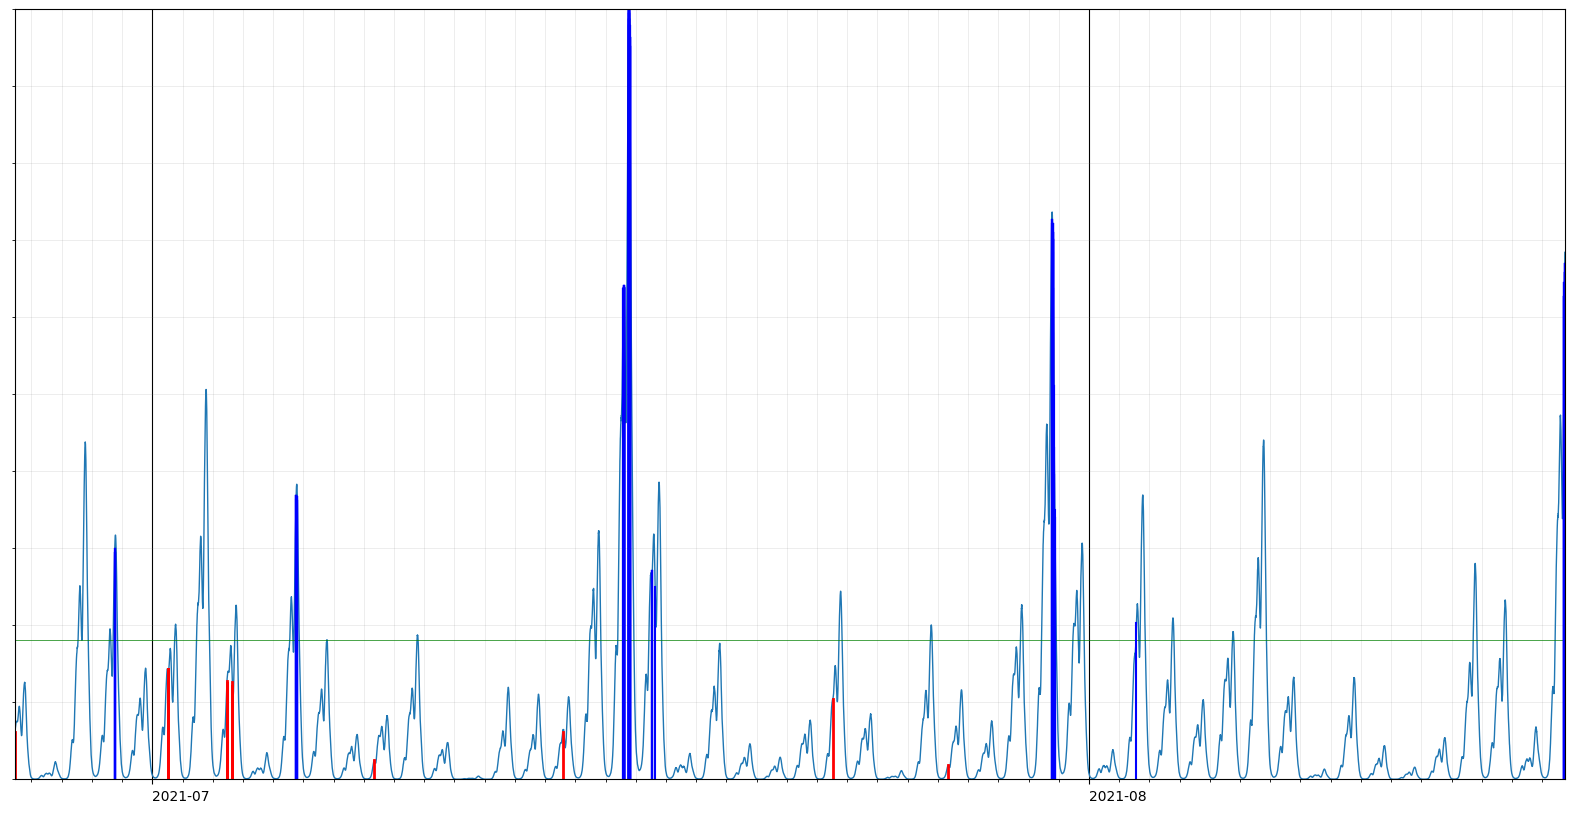

In [97]:
tss.plot_session_likelihoods(figsize=(20,10))

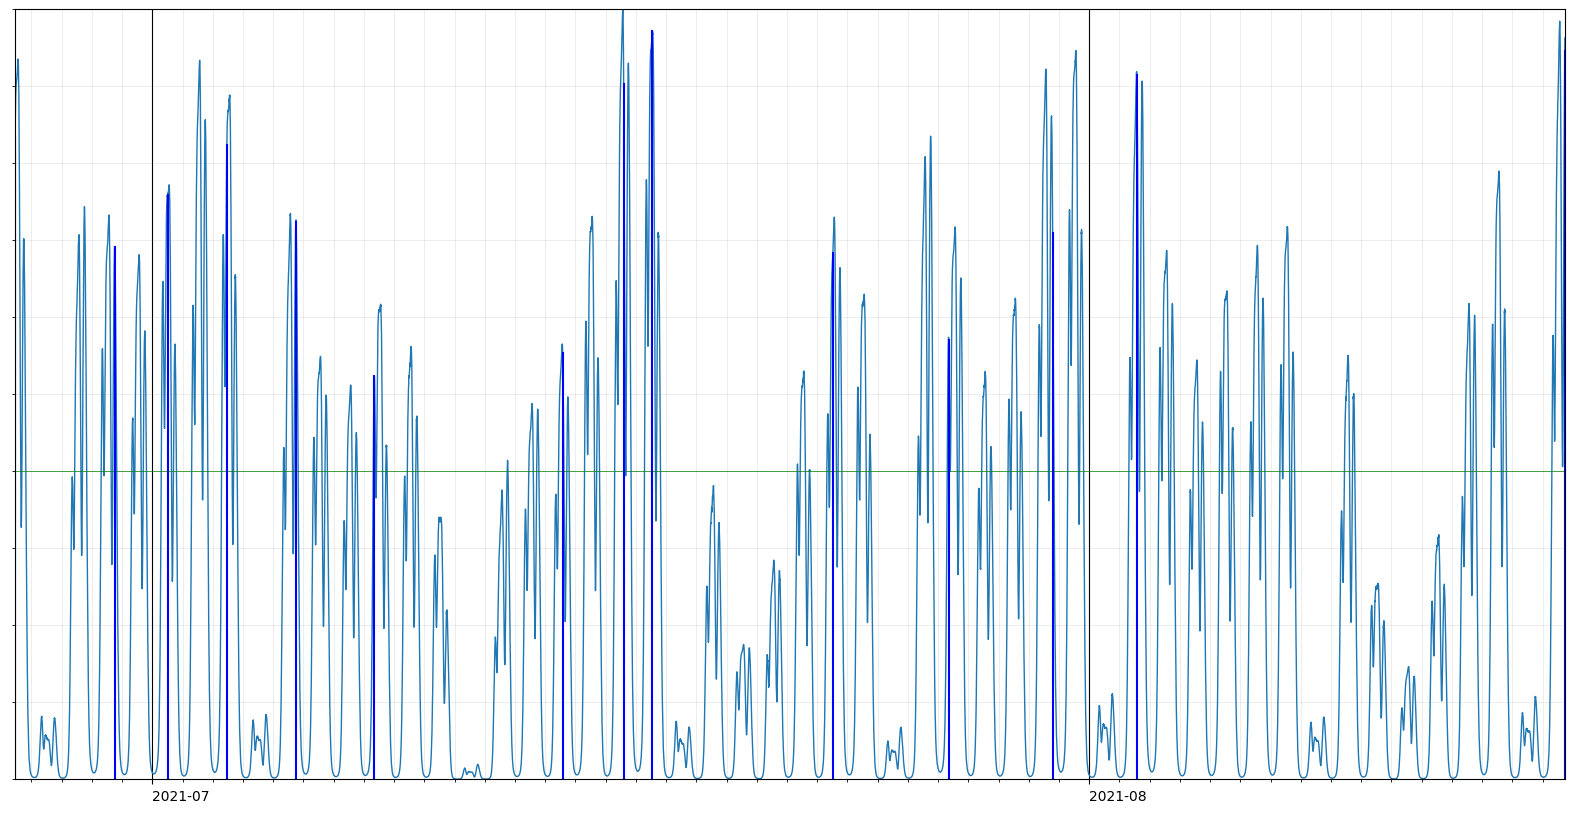

In [94]:
tss3.plot_session_likelihoods(figsize=(20,10))

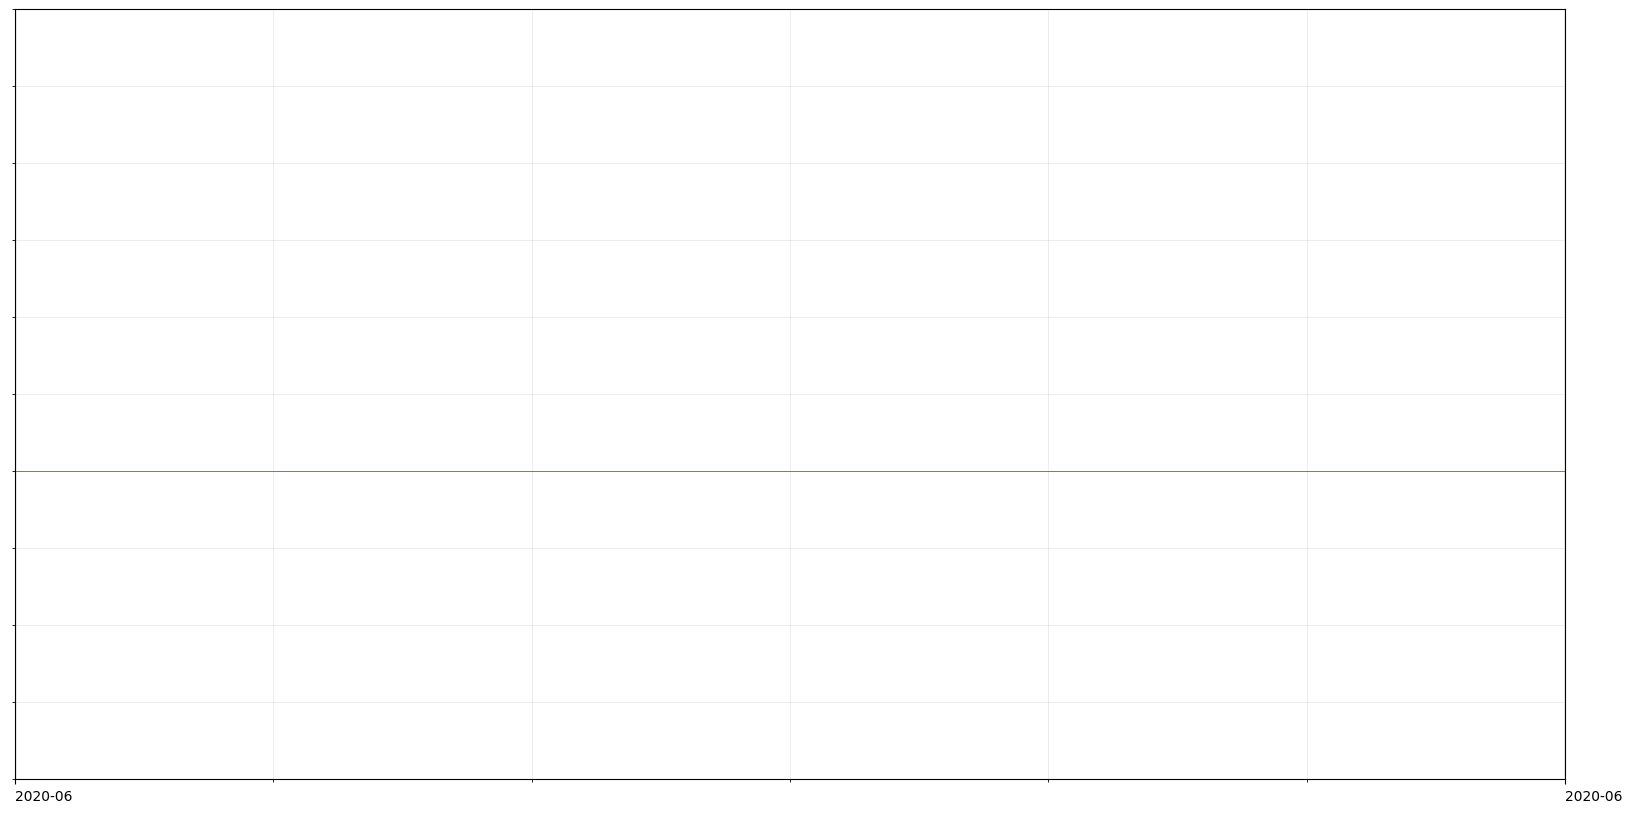

In [95]:
# filter to about 1 week
tss3.plot_session_likelihoods(figsize=(20,10), x_lim=(datetime.datetime(2020,6,8),datetime.datetime(2020,6,14)))

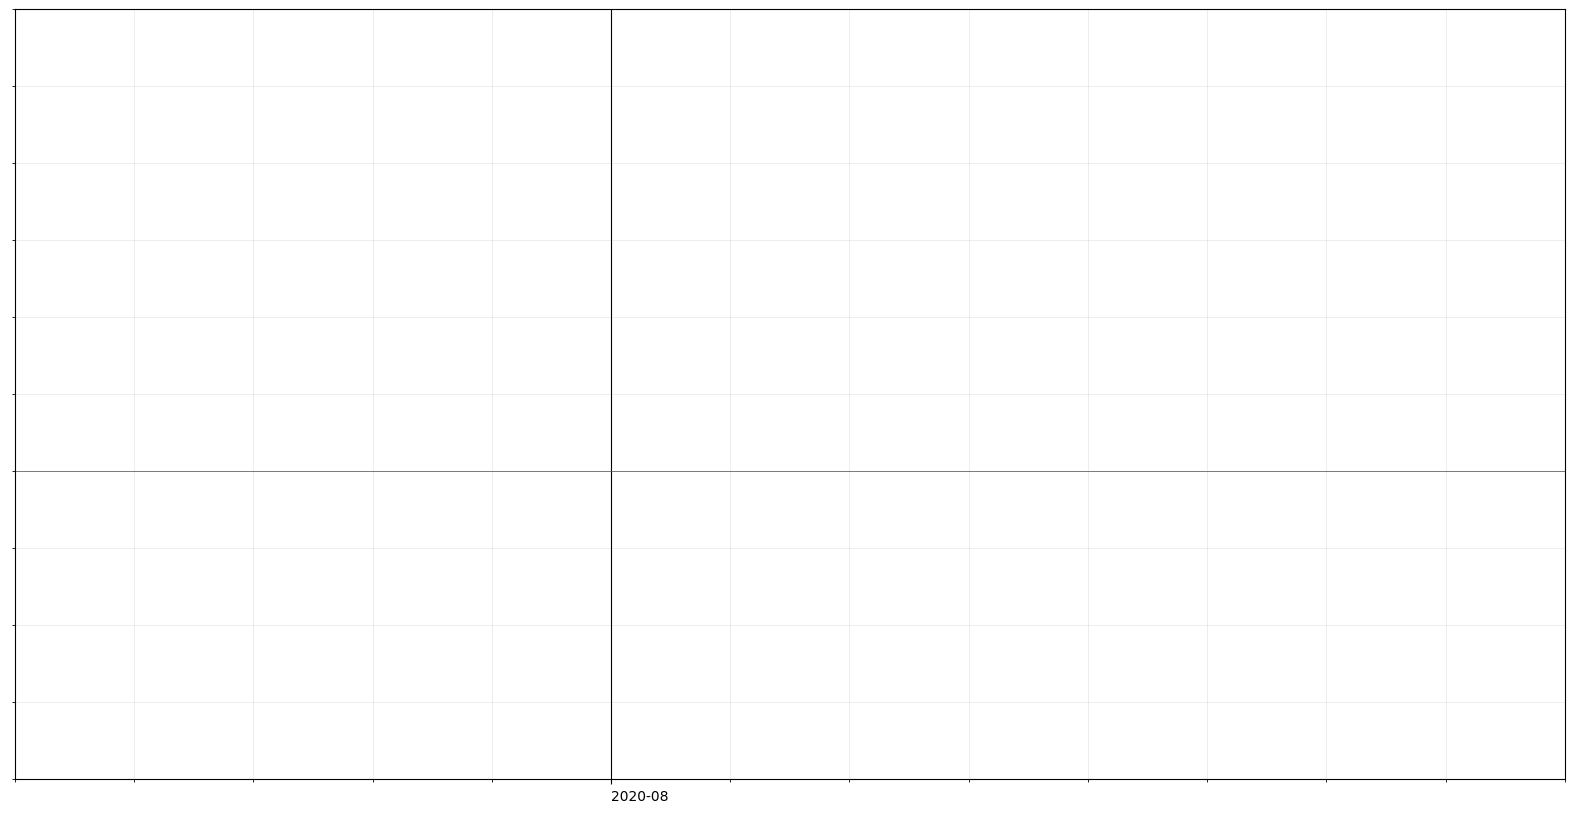

In [96]:
tss3.plot_session_likelihoods(figsize=(20,10), x_lim=(datetime.datetime(2020,7,27),datetime.datetime(2020,8,9)))

# periodicity via fourier transform

In [82]:
df = get_topk_periods(pd.Series(pd.to_datetime(tss2.timestamps)), k=1000)
df

flattening...
have 25 unique timestamps
insufficient unique timestamps, meaningless to fft (less than 30)


""


note: too many harmonics to be useful

In [83]:
df[(df['period_seconds'] > 3600) & (df['magnitude'] > 30)].sort_values('period_seconds', ascending=False).head(10)

KeyError: 'period_seconds'